In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from mpl_toolkits.mplot3d import axes3d

$$  I = \int_{0}^{2\pi} \int_{0}^{2} \int_{0}^{1} \rho z dV = \frac{4}{3} \pi$$ 

In [2]:
def func(r,z):
    return r*z

In [3]:
def CreateCylinder(Npoints,zmin,zmax,R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0, 2*np.pi)
        u = np.random.rand()
        r = R*u**(1/2.)
        z = np.random.uniform(zmin,zmax)
        
        X = np.append(X, r*np.cos(phi))
        Y = np.append(Y, r*np.sin(phi))
        Z = np.append(Z,z)
        
    return X,Y,Z

In [4]:
data = CreateCylinder(10000,0,2,1)
data = np.array(data)
Radio = 1

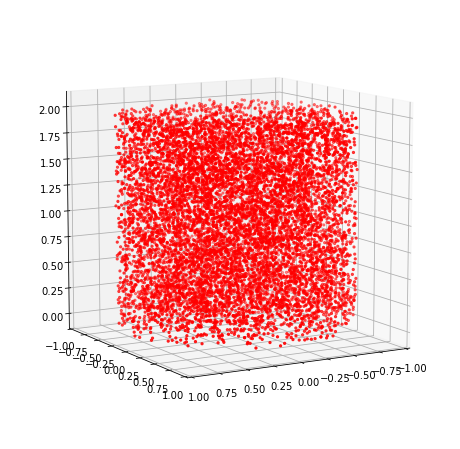

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-Radio, Radio)
ax.set_ylim3d(-Radio, Radio)
#ax.set_zlim3d(-Radio, Radio)

ax.view_init(10,60)
ax.scatter(data[0],data[1],data[2], color='r',marker='.')

In [6]:
def GetPoints(zmin,zmax,R):
    
    u = np.random.rand()
    r = R* u**(1/2.)
    z = np.random.uniform(zmin,zmax)
    
    return r,z

In [7]:
Sample = []

for i in range(100000):
    
    r,z = GetPoints(0,2,Radio)
    
    Sample.append(func(r,z))
    

In [8]:
norma = 2*np.pi

In [9]:
print(norma*np.average(Sample),  4/3.*np.pi)

4.18163803842924 4.1887902047863905


# Usando distribucion exponencial

$$  I = \int_{0}^{2\pi} \int_{0}^{2} \int_{0}^{\infty} e^{-\rho} \rho z dV = 4\pi $$ 

In [10]:
# Incluir jacobiano en la definicion
def func(r,z):
    return r*z*r

In [14]:
means = []

for _ in tqdm(range(1000)):
    r  = np.random.exponential(scale = 1, size = 100000)
    z = np.random.uniform(0,2, size = 100000)
    mean = np.average(func(r,z))*2*np.pi
    means.append(mean)

100%|██████████| 1000/1000 [00:02<00:00, 482.40it/s]


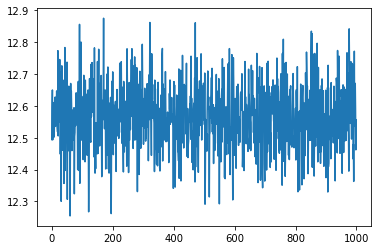

In [15]:
plt.plot([x for x in range(len(means))],means)

In [17]:
print(np.average(means), np.pi*4)

12.568020803864098 12.566370614359172
